In [1]:
#Over fitting
#Under Fitting
#Best Fitting

In [2]:
#Overfitting: Good performance on the training data, poor generliazation to other data. 
#Underfitting: Poor performance on the training data and poor generalization to other data.

In [3]:
import numpy as np
from sklearn.datasets import make_classification

In [4]:
x,y = make_classification(n_samples=50000,n_features=15) #shift+tab

In [5]:
x.shape

(50000, 15)

In [6]:
x

array([[-1.76396112,  0.09306985,  0.22715271, ..., -0.63826087,
        -0.93546452, -0.94824728],
       [-0.33575817, -1.5151645 ,  0.19253653, ...,  1.6922105 ,
        -1.06971436,  0.90814809],
       [-0.34184772,  0.0902628 ,  1.36950963, ...,  0.06846973,
         0.43363676, -0.01082867],
       ...,
       [ 0.29842139,  0.49141848,  0.7526524 , ..., -1.64248181,
        -0.46500841, -0.60159617],
       [-1.8364874 ,  1.55759901, -1.23185682, ..., -0.39314092,
         0.80676888, -0.27013598],
       [ 0.14338709, -0.19505346, -1.16246657, ..., -0.04605304,
        -0.01390742,  0.50208847]])

In [7]:
y

array([1, 1, 1, ..., 1, 0, 0])

In [8]:
y.shape

(50000,)

In [9]:
import pandas as pd
features = pd.DataFrame(x)

In [10]:
#features.to_csv('data.csv')
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.763961,0.093070,0.227153,0.813232,2.363608,-0.484835,-0.002346,-1.513004,0.610991,0.575625,0.581134,0.860144,-0.638261,-0.935465,-0.948247
1,-0.335758,-1.515164,0.192537,0.527055,-1.605770,-0.338699,-0.338063,1.898309,0.975395,0.392716,0.688712,0.452820,1.692211,-1.069714,0.908148
2,-0.341848,0.090263,1.369510,-0.818049,0.739468,-0.375403,-0.307733,0.616429,0.296150,0.113993,-0.210025,-0.961138,0.068470,0.433637,-0.010829
3,-0.281765,0.930359,1.854711,-1.093599,0.563468,-0.514761,-0.203502,-1.045403,-1.032406,0.162754,0.239222,-0.589796,1.094596,-0.309685,-0.635943
4,-0.874271,-2.470950,-1.412952,-0.973498,1.554800,1.196673,-2.439267,0.689893,0.713127,-1.183910,2.507264,1.721220,-0.477471,1.388796,2.183620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.389800,0.197001,-0.797593,-1.310792,-1.913013,1.014511,-1.829633,-0.511204,1.433940,-1.114926,-0.355894,-1.066265,-0.113803,-0.995232,0.205194
49996,-0.603226,-0.496308,-0.387597,-0.245141,-0.559234,0.318513,-1.222490,-1.491805,-1.320014,-0.311915,-0.304971,-0.716244,0.281635,-1.846747,0.562505
49997,0.298421,0.491418,0.752652,-0.992602,1.585242,0.035503,-1.320565,1.127943,-0.978213,-0.255935,0.905900,-0.728245,-1.642482,-0.465008,-0.601596
49998,-1.836487,1.557599,-1.231857,1.379559,-0.649999,0.051005,0.030757,1.354654,0.270743,0.275135,-1.105817,-0.940285,-0.393141,0.806769,-0.270136


In [11]:
classes = pd.DataFrame(y)

In [12]:
classes

,0
0,1
1,1
2,1
3,1
4,0
...,...
49995,0
49996,0
49997,1
49998,0


In [13]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y,train_size=.65,random_state=1)

In [14]:
xtrain.shape

(32500, 15)

In [15]:
xtest.shape

(17500, 15)

In [16]:
train_scores = []
test_scores = []

depth = [ n for n in range(1,15)]
#depth = np.random.randint(2,15,20)

In [17]:
depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [20]:
for i in depth:
    dt = DecisionTreeClassifier(max_depth = i)
    dt.fit(xtrain, ytrain)
    
    #train_accuracy
    train_prediction = dt.predict(xtrain)
    train_accuracy = dt.score(xtrain,ytrain)
    train_scores.append(train_accuracy)
    
    #testing_accuracy
    test_prediction = dt.predict(xtest)
    test_accuracy = dt.score(xtest,ytest)
    test_scores.append(test_accuracy)
    
    print('Depth =%d, Testing Accuracy = %f, Trainging Accuracy = %f' % (i,test_accuracy,train_accuracy))

Depth =1, Testing Accuracy = 0.889486, Trainging Accuracy = 0.894985
Depth =2, Testing Accuracy = 0.889486, Trainging Accuracy = 0.894985
Depth =3, Testing Accuracy = 0.907371, Trainging Accuracy = 0.914554
Depth =4, Testing Accuracy = 0.912457, Trainging Accuracy = 0.919569
Depth =5, Testing Accuracy = 0.920400, Trainging Accuracy = 0.929015
Depth =6, Testing Accuracy = 0.921371, Trainging Accuracy = 0.933662
Depth =7, Testing Accuracy = 0.922171, Trainging Accuracy = 0.937077
Depth =8, Testing Accuracy = 0.922286, Trainging Accuracy = 0.942585
Depth =9, Testing Accuracy = 0.920171, Trainging Accuracy = 0.948369
Depth =10, Testing Accuracy = 0.918629, Trainging Accuracy = 0.954246
Depth =11, Testing Accuracy = 0.914857, Trainging Accuracy = 0.960585
Depth =12, Testing Accuracy = 0.913657, Trainging Accuracy = 0.966708
Depth =13, Testing Accuracy = 0.910743, Trainging Accuracy = 0.972615
Depth =14, Testing Accuracy = 0.907829, Trainging Accuracy = 0.977908


In [21]:
train_scores

[0.8949846153846154,
 0.8949846153846154,
 0.9145538461538462,
 0.9195692307692308,
 0.9290153846153846,
 0.9336615384615384,
 0.937076923076923,
 0.9425846153846154,
 0.9483692307692307,
 0.9542461538461539,
 0.9605846153846154,
 0.9667076923076923,
 0.9726153846153847,
 0.9779076923076923]

In [22]:
test_scores

[0.8894857142857143,
 0.8894857142857143,
 0.9073714285714286,
 0.9124571428571429,
 0.9204,
 0.9213714285714286,
 0.9221714285714285,
 0.9222857142857143,
 0.9201714285714285,
 0.9186285714285715,
 0.9148571428571428,
 0.9136571428571428,
 0.9107428571428572,
 0.9078285714285714]

In [23]:
len(depth)

14

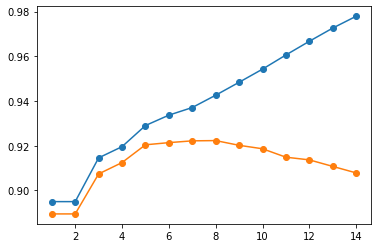

In [24]:
from matplotlib import pyplot
pyplot.plot(depth, train_scores, '-o', label='train')
pyplot.plot(depth, test_scores, '-o',label='test')

In [27]:
train_scores = []
test_scores = []

criterion = ['gini','entropy']


In [29]:
for i in criterion:
    dt = DecisionTreeClassifier(criterion = i)
    dt.fit(xtrain, ytrain)
    
    #train_accuracy
    train_prediction = dt.predict(xtrain)
    train_accuracy = dt.score(xtrain,ytrain)
    train_scores.append(train_accuracy)
    
    #testing_accuracy
    test_prediction = dt.predict(xtest)
    test_accuracy = dt.score(xtest,ytest)
    test_scores.append(test_accuracy)
    
    print(i, train_scores, test_scores)
    #print('Depth =%d, Testing Accuracy = %f, Trainging Accuracy = %f' % (i,test_accuracy,train_accuracy))

gini [1.0] [0.8959428571428572]
entropy [1.0, 1.0] [0.8959428571428572, 0.8941714285714286]
